# Kuzminov Artem

Task 3 - a Lasso Regression Analysis.

Your assignment is to run a lasso regression analysis using k-fold cross validation to identify a subset of predictors from a larger pool of predictor variables that best predicts a quantitative response variable.

In [62]:
from sklearn.datasets import load_boston
import pandas as pnd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoLarsCV
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
data = load_boston()
X_df = pnd.DataFrame(data["data"],columns=data.feature_names)
y_df = pnd.DataFrame(data["target"],columns=["MEDV"])
X_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [33]:
# standardize predictors to have mean=0 and sd=1
for clmn in X_df.columns:
    X_df[clmn]=preprocessing.scale(X_df[clmn].astype('float64'))
X_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


In [35]:
#Perfrom train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(379, 13) (127, 13) (379, 1) (127, 1)


In [43]:
cv_model=LassoLarsCV(cv=10).fit(X_train,y_train)
# print variable names and regression coefficients
dict(zip(X_train.columns, cv_model.coef_))

C:\Users\Kuzminov\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'CRIM': -1.077886311730962,
 'ZN': 1.2590138042453527,
 'INDUS': 0.33740628324343025,
 'CHAS': 0.5339666347747145,
 'NOX': -2.056027586922281,
 'RM': 2.860884463600415,
 'AGE': -0.09661474351448775,
 'DIS': -2.988121226214847,
 'RAD': 2.2974097228676422,
 'TAX': -1.9064143085395255,
 'PTRATIO': -2.0872151742135645,
 'B': 0.9094962339700948,
 'LSTAT': -3.384450197410997}

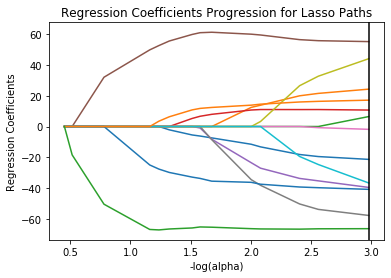

In [71]:
# plot coefficient progression
m_log_alphas = -np.log10(cv_model.alphas_)
ax = plt.gca()
plt.plot(m_log_alphas, cv_model.coef_path_.T)
plt.axvline(-np.log10(cv_model.alpha_), linestyle='-', color='k', label='Alpha CV')
plt.ylabel('Regression Coefficients')
plt.xlabel('-log(alpha)')
plt.title('Regression Coefficients Progression for Lasso Paths')
plt.show()

C:\Users\Kuzminov\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


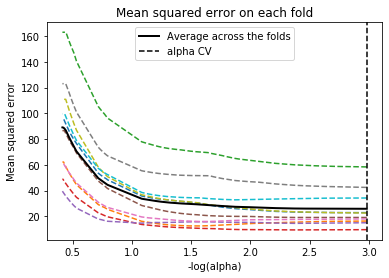

In [56]:
# plot mean square error for each fold
m_log_alphascv = -np.log10(cv_model.cv_alphas_)
plt.figure()
plt.plot(m_log_alphascv, cv_model.mse_path_, '--')
plt.plot(m_log_alphascv, cv_model.mse_path_.mean(axis=-1), 'k', label='Average across the folds', linewidth=2)
plt.axvline(-np.log10(cv_model.alpha_), linestyle='--', color='k', label='alpha CV')
plt.legend()
plt.xlabel('-log(alpha)')
plt.ylabel('Mean squared error')
plt.title('Mean squared error on each fold')
plt.show()

In [68]:
# MSE from training and test data
train_error = mean_squared_error(y_train, cv_model.predict(X_train))
test_error = mean_squared_error(y_test, cv_model.predict(X_test))
print ('Training data MSE: ' + str(train_error))
print ('Test data MSE: ' + str(test_error))

Training data MSE: 23.424335746541765
Test data MSE: 18.139951033000624


In [69]:
# R-square from training and test data
rsquared_train=cv_model.score(X_train,y_train)
rsquared_test=cv_model.score(X_test,y_test)
print ('Training data R-square: ' + str(rsquared_train))
print ('Test data R-square: ' + str(rsquared_test))

Training data R-square: 0.7345311596539874
Test data R-square: 0.7506192383944136


# Output

Lasso regression was used to predict cost of houses in Boston, USA. The response variable is quntitative, a real number. There are 13 predictors in the beggining, all of them are quantitative, real numbers, apart from 2 categorical parameters: CHAS and RAD.